# Clase 7- RNN y LSTM - GRU

## Redes Neuronales Recurrentes (RNN)

### Conceptos

**1. ¿Qué es?**  
Las Redes Neuronales Recurrentes (RNN) son un tipo de red neuronal diseñada específicamente para procesar datos secuenciales. A diferencia de las redes neuronales tradicionales, las RNN tienen conexiones cíclicas que les permiten mantener un estado interno y utilizar información pasada para influir en las predicciones actuales.

**2. ¿Para qué sirve y cuáles son sus casos de uso frecuentes?**  
Las RNN son ideales para tareas donde los datos tienen dependencias temporales o secuenciales. Algunos casos de uso frecuentes incluyen:
- Procesamiento del Lenguaje Natural (NLP): Clasificación de texto, traducción automática, generación de texto.
- Predicción de Series Temporales: Análisis financiero, previsión meteorológica.
- Reconocimiento de Voz: Conversión de audio a texto.
- Generación de Secuencias: Creación de música, generación de texto o patrones.

**3. ¿Cómo funciona a nivel general?**  
El funcionamiento de una RNN se basa en el concepto de mantener un "estado oculto" que se actualiza con cada nuevo dato de la secuencia:
- Entrada Secuencial: Procesa los elementos de la secuencia uno por uno.
- Estado Oculto: Almacena información de los pasos anteriores para capturar dependencias en la secuencia.
- Salida: Genera una predicción en cada paso o al final de la secuencia, dependiendo de la tarea.

Este diseño permite a las RNN manejar información pasada en el contexto de los datos actuales, pero puede enfrentar problemas como el desvanecimiento o la explosión del gradiente.

**4. ¿Cómo funciona el algoritmo?**  
El algoritmo de una RNN simple sigue estos pasos:

- Inicialización del Estado Oculto:
  $h_0$ se inicializa como un vector de ceros o valores aprendidos.
  
- Procesamiento Secuencial:
  Para cada entrada $x_t$ en la secuencia, el estado oculto $h_t$ se actualiza usando:
  $$
  h_t = f(W_h h_{t-1} + W_x x_t + b_h)
  $$
  Donde:
  - $W_h$ son los pesos recurrentes.
  - $W_x$ son los pesos de la entrada.
  - $b_h$ es el sesgo.
  - $f$ es la función de activación (e.g., $\tanh$ o sigmoide).

- Salida:
  La salida $y_t$ en cada paso se calcula como:
  $$
  y_t = g(W_y h_t + b_y)
  $$
  Donde $g$ es la función de activación de salida (e.g., sigmoide para tareas binarias).

- Entrenamiento:
  Se utiliza retropropagación a través del tiempo (BPTT) para ajustar los pesos, calculando gradientes a lo largo de toda la secuencia.

### Ejemplo: Clasificación de Sentimientos con una RNN desde 0

#### Descripción del dataset

Descripción del Dataset IMDB
El conjunto de datos IMDB (Internet Movie Database) es un dataset ampliamente utilizado para tareas de procesamiento del lenguaje natural, como la clasificación de sentimientos. Contiene reseñas de películas etiquetadas como positivas o negativas.

Contenido del Dataset
Reseñas de Películas:
Cada reseña es una secuencia de palabras preprocesadas y tokenizadas, donde cada palabra se representa como un entero que indica su posición en un vocabulario de las palabras más frecuentes.

Etiquetas de Sentimiento:

1: Indica que la reseña tiene un sentimiento positivo.
0: Indica que la reseña tiene un sentimiento negativo.
División de Datos:

Entrenamiento: 25,000 reseñas etiquetadas.
Prueba: 25,000 reseñas etiquetadas.
Restricciones de Longitud:
Puedes limitar la cantidad de palabras a las más frecuentes (por ejemplo, las 10,000 más comunes) y truncar o rellenar (padding) las secuencias para que todas tengan la misma longitud.

In [1]:
# Importar las bibliotecas necesarias
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

# Definir los parámetros del conjunto de datos
max_features = 10000  # Número máximo de palabras en el vocabulario
maxlen = 500  # Longitud máxima de las secuencias (padding)

# Cargar y explorar el dataset
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)

# Mostrar una reseña en formato tokenizado y su etiqueta
print("Reseña tokenizada:", X_train[0])
print("Etiqueta (sentimiento):", y_train[0])

Reseña tokenizada: [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
Etiqueta (sentimiento): 1


#### Características del Dataset

* Preprocesamiento: Las palabras ya están tokenizadas y convertidas en índices de un vocabulario.
* Vocabulario: Puedes limitar el tamaño del vocabulario con num_words, que selecciona las palabras más frecuentes.
* Longitud de las Secuencias: Las reseñas tienen longitudes variables; es común usar pad_sequences para normalizarlas.
* Link a la Documentación Oficial --> Puedes consultar más detalles sobre este dataset en la documentación oficial de TensorFlow: 

    * https://www.tensorflow.org/datasets/catalog/imdb_reviews?hl=es-419
    * https://ai.stanford.edu/%7Eamaas/data/sentiment/

**Resumen**

El dataset IMDB es un recurso excelente para aprender clasificación de texto, ya que:

* Es relativamente pequeño, permitiendo entrenar modelos en laptops personales.
* Incluye datos preprocesados, lo que facilita su uso sin necesidad de procesamiento inicial.
* Representa un caso práctico realista de análisis de sentimientos.

#### ¿Cómo Se Tokeniza el Dataset?

##### El proceso de tokenización 

**El proceso de tokenización en el dataset IMDB preprocesado incluye:**

* Construcción del Vocabulario: Se identifican las palabras más frecuentes del corpus.
* Asignación de Índices: Cada palabra del vocabulario se asigna a un número entero basado en su frecuencia (las palabras más comunes tienen índices más bajos).
* Conversión a Secuencias: Las reseñas se convierten en secuencias de números enteros donde cada número representa una palabra en el vocabulario.

**Proceso de Tokenización (Paso a Paso)**

* Limpieza del Texto: Se eliminan caracteres especiales y se convierten todas las palabras a minúsculas.
* División en Palabras (Tokenización): Se dividen las frases en palabras individuales.
* Mapeo a Índices: Cada palabra se reemplaza con su índice correspondiente en el vocabulario.
* Padding: Las secuencias más cortas se rellenan con ceros para tener una longitud uniforme.

##### Reconstruir una Reseña Original Tokenizada

El dataset incluye un diccionario invertido (index_word) que puedes usar para convertir índices de nuevo a palabras.

In [2]:
# Cargar el conjunto de datos IMDB
max_features = 10000
(X_train, y_train), _ = imdb.load_data(num_words=max_features)

# Obtener el índice de palabras
word_index = imdb.get_word_index()
reverse_word_index = {value: key for key, value in word_index.items()}

# Seleccionar una reseña tokenizada
tokenized_review = X_train[0]

# Reconstruir la reseña original
decoded_review = " ".join([reverse_word_index.get(i - 3, "?") for i in tokenized_review])

# Mostrar resultados
print("Reseña tokenizada:", tokenized_review)
print("Reseña original reconstruida:", decoded_review)


Reseña tokenizada: [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
Reseña original reconstruida: ? this film

In [3]:
# Seleccionar una reseña tokenizada
tokenized_review = X_train[400]

# Reconstruir la reseña original
decoded_review = " ".join([reverse_word_index.get(i - 3, "?") for i in tokenized_review])

# Mostrar resultados
print("Reseña tokenizada:", tokenized_review)
print("Reseña original reconstruida:", decoded_review)

Reseña tokenizada: [1, 11, 1043, 541, 47, 8, 30, 2, 17, 86, 967, 20, 231, 60, 48, 4, 875, 551, 9, 44, 17, 2671, 17, 12, 214, 11, 4, 182, 7, 97, 264, 21, 22, 1359, 451, 144, 407, 169, 14, 31, 6, 3133, 418, 7, 157, 448, 17, 12, 9, 23, 6, 283, 113, 823, 5914, 10, 10, 12, 2013, 19, 2, 8906, 228, 467, 4, 898, 5, 2, 905, 2692, 7, 6, 6241, 2647, 5576, 1841, 5398, 543, 2620, 956, 4, 1310, 7, 4, 22, 60, 159, 4, 898, 130, 4, 503, 1992, 1381, 7, 6138, 2370, 127, 6, 897, 292, 208, 39, 4, 380, 10, 10, 82, 788, 39, 4, 380, 670, 4215, 5, 1091, 2613, 26, 1249, 1447, 156, 36, 81, 6, 87, 292, 7, 2265, 879, 3649, 3999, 267, 18, 4, 375, 3974, 126, 67, 6, 5288, 2, 11, 4, 5318, 1153, 609, 57, 50, 26, 107, 2572, 7, 2269, 11, 14, 182, 31, 18, 4, 1026, 5, 31, 18, 4, 338, 560, 2613, 656, 6, 2, 7, 5212, 496, 4, 6939, 10, 10, 199, 26, 5895, 8, 1665, 4, 2524, 7, 6, 3886, 223, 800, 57, 6066, 5, 1200, 57, 4684, 496, 10, 10, 4215, 2, 44, 102, 5, 536, 7, 3266, 18, 1818, 11, 2713, 560, 377, 7106, 11, 2, 7, 4, 2, 2, 35,

#### Ejecutamos el modelo

In [19]:
# Cargar el conjunto de datos IMDB
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_features)

# Padding para igualar la longitud de las secuencias
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

# Mostrar las dimensiones de los datos
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

X_train shape: (25000, 500)
X_test shape: (25000, 500)


In [ ]:
# Crear el modelo RNN
model = Sequential([
    Embedding(input_dim=max_features,output_dim = 32, input_length=maxlen),  # Capa de embedding
    SimpleRNN(32),  # Capa recurrente
    Dense(1, activation='sigmoid'),  # Capa de salida
])

# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Mostrar un resumen del modelo
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_8 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_14 (SimpleRNN)       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

**¿Para qué se utiliza la capa de Embedding?**

La capa de embedding en redes neuronales se utiliza para transformar datos categóricos (como palabras o tokens) en vectores densos de características en un espacio continuo de menor dimensión. Esta representación es clave para tareas de Procesamiento del Lenguaje Natural (NLP) y otras que involucran datos categóricos.

**Cómo funciona**

La capa de embedding mapea índices enteros (por ejemplo, palabras representadas como números) a vectores densos de números reales. Esto significa que palabras similares en términos de significado o uso tienden a estar representadas por vectores cercanos en este espac

**Funcionalidad de la Capa**

1. **Dimensionalidad Reducida:**
    Convierte una palabra o token, representado por un entero, en un vector de dimensión fija.
    Por ejemplo: Si una palabra está representada como índice 42, la capa de embedding podría mapearla a un vector como:
    $[0.1, 0.3, -0.4, 0.8]$.

2. **Aprendizaje del Espacio de Características:**
    Durante el entrenamiento, los vectores de embedding se ajustan para capturar relaciones semánticas entre palabras. Palabras con significados similares terminan con vectores similares.

3. **Representaciones Densas:**
    Reemplaza las representaciones esparsas (e.g., codificación one-hot) con representaciones densas, que son computacionalmente más eficientes y útiles para capturar relaciones complejas

In [26]:
# Entrenar el modelo
history = model.fit(
    X_train, y_train,
    epochs=5,
    batch_size=64,
    validation_split=0.2  # Usar el 20% de los datos de entrenamiento para validación
)

Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 61ms/step - accuracy: 0.5690 - loss: 0.6661 - val_accuracy: 0.7508 - val_loss: 0.5135
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 62ms/step - accuracy: 0.8255 - loss: 0.3944 - val_accuracy: 0.6294 - val_loss: 0.6412
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 62ms/step - accuracy: 0.8180 - loss: 0.4150 - val_accuracy: 0.7818 - val_loss: 0.5124
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 62ms/step - accuracy: 0.9588 - loss: 0.1288 - val_accuracy: 0.7260 - val_loss: 0.7290
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 64ms/step - accuracy: 0.9925 - loss: 0.0375 - val_accuracy: 0.7922 - val_loss: 0.6645


In [27]:
# Evaluar el modelo en el conjunto de prueba
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Precisión en el conjunto de prueba: {test_acc:.4f}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.7910 - loss: 0.6640
Precisión en el conjunto de prueba: 0.7889


##### Solucionando el over-fitting

In [ ]:
from tensorflow.keras.optimizers import Adam
# Crear el modelo RNN
model = Sequential([
    Embedding(input_dim=max_features,output_dim = 16, input_length=maxlen),  # Capa de embedding
    SimpleRNN(16),  # Capa recurrente
    Dense(1, activation='sigmoid'),  # Capa de salida
])

# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(
    X_train, y_train,
    epochs=5,
    batch_size=64,
    validation_split=0.2  # Usar el 20% de los datos de entrenamiento para validación
)

In [31]:
from tensorflow.keras.optimizers import Adam
# Crear el modelo RNN
model = Sequential([
    Embedding(input_dim=max_features,output_dim = 16, input_length=maxlen),  # Capa de embedding
    SimpleRNN(16),  # Capa recurrente
    Dense(1, activation='sigmoid'),  # Capa de salida
])

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.1), loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(
    X_train, y_train,
    epochs=5,
    batch_size=64,
    validation_split=0.3  # Usar el 30% de los datos de entrenamiento para validación
)

Epoch 1/5
274/274 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - accuracy: 0.5391 - loss: 0.7027 - val_accuracy: 0.5835 - val_loss: 0.6931
Epoch 2/5
274/274 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.6329 - loss: 0.6418 - val_accuracy: 0.5923 - val_loss: 0.6803
Epoch 3/5
274/274 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.6488 - loss: 0.6286 - val_accuracy: 0.6007 - val_loss: 0.6815
Epoch 4/5
274/274 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - accuracy: 0.6618 - loss: 0.5995 - val_accuracy: 0.5956 - val_loss: 0.6713
Epoch 5/5
274/274 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - accuracy: 0.6645 - loss: 0.6031 - val_accuracy: 0.5832 - val_loss: 0.6958


In [32]:
# Crear el modelo RNN
model = Sequential([
    Embedding(input_dim=max_features,output_dim = 16, input_length=maxlen),  # Capa de embedding
    SimpleRNN(16),  # Capa recurrente
    Dense(1, activation='sigmoid'),  # Capa de salida
])

# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(
    X_train, y_train,
    epochs=5,
    batch_size=64,
    validation_split=0.3  # Usar el 20% de los datos de entrenamiento para validación
)

Epoch 1/5
274/274 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.5443 - loss: 0.6834 - val_accuracy: 0.7532 - val_loss: 0.5117
Epoch 2/5
274/274 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - accuracy: 0.8237 - loss: 0.4047 - val_accuracy: 0.8132 - val_loss: 0.4215
Epoch 3/5
274/274 ━━━━━━━━━━━━━━━━━━━━ 9s 32ms/step - accuracy: 0.8904 - loss: 0.2842 - val_accuracy: 0.8540 - val_loss: 0.3680
Epoch 4/5
274/274 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - accuracy: 0.9216 - loss: 0.2140 - val_accuracy: 0.8505 - val_loss: 0.3761
Epoch 5/5
274/274 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - accuracy: 0.9457 - loss: 0.1557 - val_accuracy: 0.8539 - val_loss: 0.3864


In [33]:
# Evaluar el modelo en el conjunto de prueba
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Precisión en el conjunto de prueba: {test_acc:.4f}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8448 - loss: 0.4063
Precisión en el conjunto de prueba: 0.8456


## LSTM (Long Short-Term Memory)

### Conceptos

**1. ¿Qué es?**  
LSTM es una arquitectura avanzada de RNN diseñada para abordar el problema del desvanecimiento del gradiente, introduciendo una estructura de "celdas de memoria" que puede retener información relevante durante períodos largos de tiempo.

**2. ¿Para qué sirve y cuáles son sus casos de uso frecuentes?**  
LSTM se utiliza en tareas donde las dependencias a largo plazo son importantes. Casos de uso frecuentes incluyen:
- Traducción automática.
- Modelado de lenguaje.
- Predicción de eventos en series temporales largas.

**3. ¿Cómo funciona a nivel general?**  
Un LSTM utiliza puertas para controlar qué información se mantiene, se actualiza o se olvida en cada paso de la secuencia:
- Puerta de Olvido: Decide qué información eliminar.
- Puerta de Entrada: Determina qué nueva información agregar.
- Estado de la Celda: Actualiza la memoria de la celda con información relevante.
- Puerta de Salida: Decide qué información emitir como salida.

**4. ¿Cómo funciona el algoritmo?**  
Cada celda LSTM sigue estos pasos:

- Puerta de Olvido:
  $$
  f_t = \sigma(W_f [h_{t-1}, x_t] + b_f)
  $$

- Puerta de Entrada:
  $$
  i_t = \sigma(W_i [h_{t-1}, x_t] + b_i)
  $$
  $$
  \tilde{C}_t = \tanh(W_C [h_{t-1}, x_t] + b_C)
  $$

- Actualización del Estado de la Celda:
  $$
  C_t = f_t \odot C_{t-1} + i_t \odot \tilde{C}_t
  $$

- Puerta de Salida:
  $$
  o_t = \sigma(W_o [h_{t-1}, x_t] + b_o)
  $$
  $$
  h_t = o_t \odot \tanh(C_t)
  $$

### Ejemplo

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# Parámetros del dataset
max_features = 20000  # Número máximo de palabras en el vocabulario
maxlen = 1000  # Longitud máxima de las secuencias (padding)

# Cargar el conjunto de datos IMDB
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_features)

# Padding de secuencias para que todas tengan la misma longitud
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

# Dimensiones de las entradas
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")


X_train shape: (25000, 1000), X_test shape: (25000, 1000)


In [41]:
# Construir el modelo LSTM
model = Sequential([
    Embedding(input_dim=max_features, output_dim=32, input_length=maxlen),  # Capa de embedding
    LSTM(32, dropout=0.2, recurrent_dropout=0.2),  # LSTM con dropout
    Dense(1, activation='sigmoid')  # Capa de salida para clasificación binaria
])

# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Mostrar el resumen del modelo
model.summary()


/opt/miniconda3/envs/deep_learning/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_15 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [46]:
# Configurar Early Stopping para evitar sobreajuste
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Entrenar el modelo
history = model.fit(
    X_train, y_train,
    epochs=20,  # Máximo número de épocas
    batch_size=64,  # Tamaño de los lotes
    validation_split=0.3,  # Usar 20% de los datos de entrenamiento para validación
    callbacks=[early_stopping]
)


Epoch 1/20
274/274 ━━━━━━━━━━━━━━━━━━━━ 54s 197ms/step - accuracy: 0.8934 - loss: 0.2789 - val_accuracy: 0.8567 - val_loss: 0.3504
Epoch 2/20
274/274 ━━━━━━━━━━━━━━━━━━━━ 54s 198ms/step - accuracy: 0.9110 - loss: 0.2486 - val_accuracy: 0.7068 - val_loss: 0.9172
Epoch 3/20
274/274 ━━━━━━━━━━━━━━━━━━━━ 55s 199ms/step - accuracy: 0.7554 - loss: 0.5697 - val_accuracy: 0.8459 - val_loss: 0.3846
Epoch 4/20
274/274 ━━━━━━━━━━━━━━━━━━━━ 56s 205ms/step - accuracy: 0.8860 - loss: 0.3014 - val_accuracy: 0.8512 - val_loss: 0.3770


In [49]:
# Evaluar el modelo en el conjunto de prueba
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Pérdida en el conjunto de prueba: {test_loss:.4f}")
print(f"Precisión en el conjunto de prueba: {test_acc:.4f}")


782/782 ━━━━━━━━━━━━━━━━━━━━ 22s 28ms/step - accuracy: 0.8306 - loss: 0.3985
Pérdida en el conjunto de prueba: 0.3931
Precisión en el conjunto de prueba: 0.8337


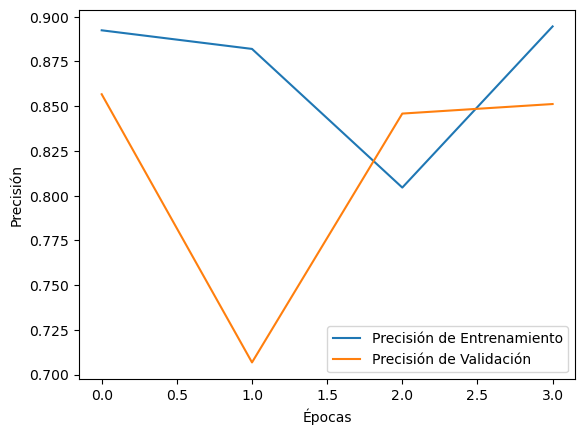

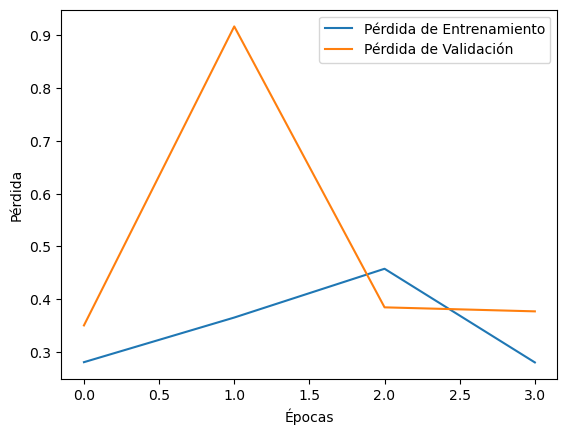

In [50]:
import matplotlib.pyplot as plt

# Graficar precisión de entrenamiento y validación
plt.plot(history.history['accuracy'], label='Precisión de Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de Validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()

# Graficar pérdida de entrenamiento y validación
plt.plot(history.history['loss'], label='Pérdida de Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de Validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()


## GRU (Gated Recurrent Unit)

**1. ¿Qué es?**  
El GRU es una variante simplificada del LSTM que combina las puertas de entrada y olvido en una única puerta, haciendo que sea más eficiente computacionalmente.

**2. ¿Para qué sirve y cuáles son sus casos de uso frecuentes?**  
GRU es útil en tareas similares al LSTM, pero es preferido en aplicaciones donde se requiere menor complejidad computacional.

**3. ¿Cómo funciona a nivel general?**  
En lugar de utilizar celdas de memoria separadas, el GRU tiene un estado oculto único que se actualiza utilizando dos puertas:
- Puerta de Actualización: Decide cuánto de la información pasada retener.
- Puerta de Reinicio: Controla cuánto de la nueva información agregar.

**4. ¿Cómo funciona el algoritmo?**  
Los pasos básicos de un GRU son:

- Puerta de Actualización:
  $$
  z_t = \sigma(W_z [h_{t-1}, x_t] + b_z)
  $$

- Puerta de Reinicio:
  $$
  r_t = \sigma(W_r [h_{t-1}, x_t] + b_r)
  $$

- Cálculo del Nuevo Estado:
  $$
  \tilde{h}_t = \tanh(W [r_t \odot h_{t-1}, x_t] + b)
  $$

- Actualización del Estado Oculto:
  $$
  h_t = (1 - z_t) \odot h_{t-1} + z_t \odot \tilde{h}_t
  $$

Estas arquitecturas permiten manejar dependencias secuenciales de manera eficiente y superar las limitaciones de las RNN simples.